# California Housing Data Analysis

In this notebook, I will try to analyze the performance of different machine learning models regarding a well-known dataset: the California Housing Dataset. The dataset contains more than 20,000 observations regarding California housing.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation


In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

### Dataset information

Once the dataset is loaded, we will take a look at the description to check out the attributes information and possible missing values.

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The dataset contains more than 20,000 observations regarding California housing. It contains information about the median income in the block, the median house age or the average number of rooms per household among others. And, the most important thing, there isn't any missing values so we don't have to spend time cleaning the data.

Let's take a look at the data structure.

In [4]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now, let's have a look at the value to be predicted:

In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target value consist in the median house value for each district. We will try to estimate it based on the predictor variables like the age of the house, the number of rooms...

### Exploratory analysis

In [6]:
california_housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


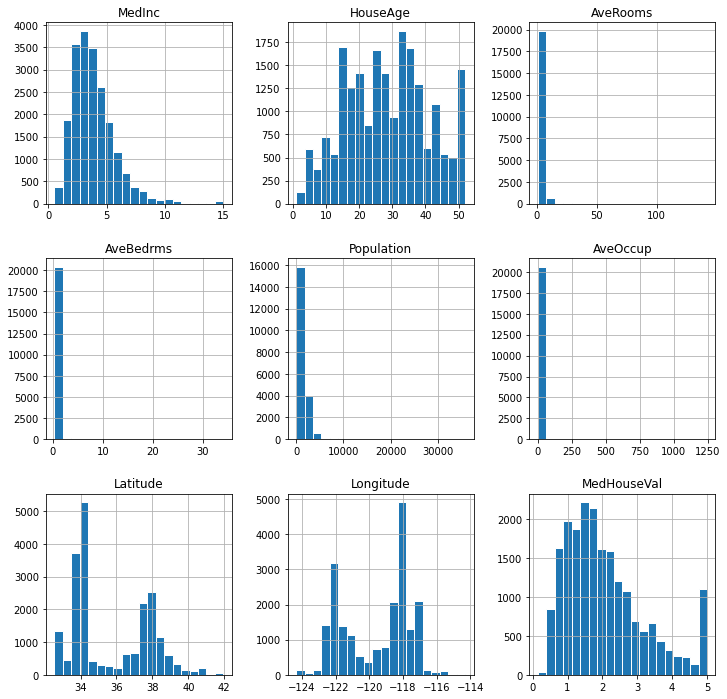

In [7]:
california_housing.frame.hist(figsize=(12,12), bins=20, edgecolor='white')
plt.subplots_adjust(hspace=0.3, wspace=0.3)


plt.show()

From the previous visualization, we can draw some interesting facts:

* The median income in somewhat normally distributed. Few people earns very little many and few people make a lot of money.
* The median house age distribution is more or less uniform.
* The median house value is skewed to the right. Also, all values above 5 are marked as 5. 

As we cannot get any insights from the average rooms, bedrooms, occupation and population, we will describe its statistics to know more.

In [8]:
california_housing.frame[['AveRooms', 'AveBedrms', 'Population', 'AveOccup']].describe()

,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,1425.476744,3.070655
std,2.474173,0.473911,1132.462122,10.386050
min,0.846154,0.333333,3.000000,0.692308
25%,4.440716,1.006079,787.000000,2.429741
50%,5.229129,1.048780,1166.000000,2.818116
75%,6.052381,1.099526,1725.000000,3.282261
max,141.909091,34.066667,35682.000000,1243.333333


Looking at the max values, we can get an idea of why the distribution is plotted like that. The difference between the 75% and the max value is huge.

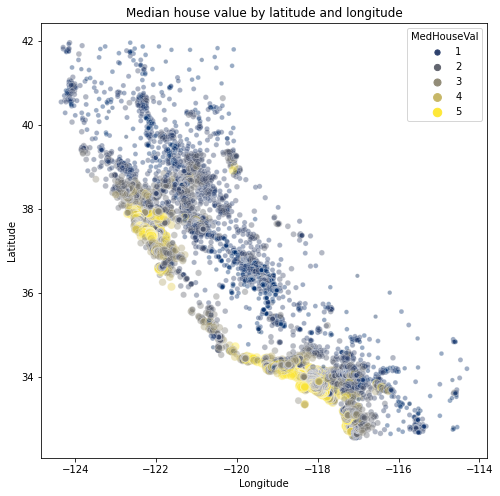

In [9]:
fig, ax = plt.subplots(figsize=[8,8])

sns.scatterplot(data=california_housing.frame, y='Latitude', x='Longitude', alpha=0.4, hue='MedHouseVal', size='MedHouseVal', palette='cividis')

ax.set_title('Median house value by latitude and longitude')

plt.show()

The scatter plot above shows the relation between the location and the house value. It is important to notice that the figure resemble the state of California. This said, there are two notorious clusters were houses have a higher prices: Los Angeles and San Francisco area.

## Regression models

Once we have explore visually the variables, it is time to look for the most accurate regression model. Remember that we are trying to estimate the price of the house based on different variables like the location and the number of bedrooms among others. 

Let's define the predictor and target variables. But first, let's remove all the observations in which the house value is 5 as they can make our model less precise.

In [10]:
california_housing_filtered = california_housing.frame[california_housing.frame['MedHouseVal'] < 5]

In [11]:
X = california_housing_filtered.drop('MedHouseVal', axis=1).values
y = california_housing_filtered['MedHouseVal'].values

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset between test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Linear
lreg = LinearRegression()
lreg_coef = lreg.fit(X, y).coef_

# Linear score
lreg.fit(X_train, y_train)
lreg_pred = lreg.predict(X_test)
lreg_score = lreg.score(X_test, y_test)
print('The linear regression score is: ' + str(lreg_score))

The linear regression score is: 0.5679160646105937


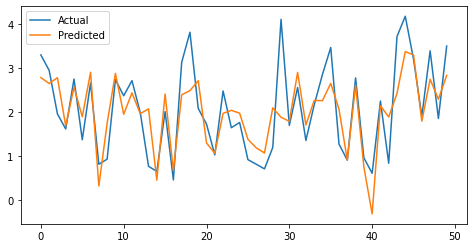

In [18]:
linear_df = pd.DataFrame({'y_test': y_test, 'linear_pred': lreg_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(linear_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

#### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

# Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Lasso score
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_score = lasso.score(X_test, y_test)
print('The lasso regression score is: ' + str(lasso_score))

The lasso regression score is: 0.4852240585919536


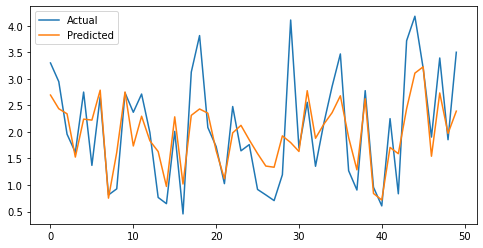

In [20]:
lasso_df = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(lasso_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

#### Ridge Regression

In [21]:
from sklearn.linear_model import Ridge


# Ridge
ridge = Ridge(alpha=0.1)
ridge_coef = ridge.fit(X, y).coef_

# Ridge score
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_score = ridge.score(X_test, y_test)
print('The ridge regression score is: ' + str(ridge_score))

The ridge regression score is: 0.5679150330218798


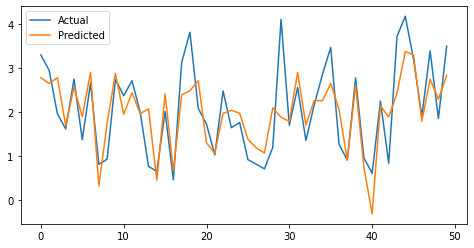

In [22]:
ridge_df = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(ridge_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

#### Decission Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Tree
tree = DecisionTreeRegressor()

# Tree score
tree.fit(X_train, y_train)
tree_score = tree.score(X_test, y_test)
tree_pred = tree.predict(X_test)
print('The decission tree regression score is: ' + str(tree_score))

The decission tree regression score is: 0.5544418594039235


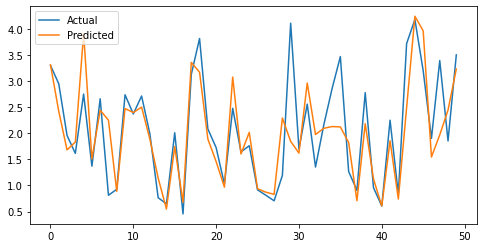

In [24]:
tree_df = pd.DataFrame({'Actual': y_test, 'Predicted': tree_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(tree_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

### ElasticNet

In [25]:
from sklearn.linear_model import ElasticNet

# en

en = ElasticNet(random_state=0)

# en score
en.fit(X_train, y_train)
en_score = en.score(X_test, y_test)
en_pred = en.predict(X_test)
print('The ElasticNet regression score is: ' + str(en_score))


The ElasticNet regression score is: 0.29449242304457723


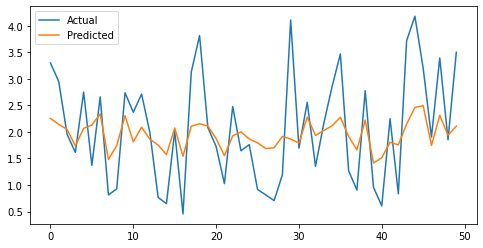

In [26]:
en_df = pd.DataFrame({'Actual': y_test, 'Predicted': en_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(en_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

#### Random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

# forest
forest = RandomForestRegressor()

# Tree score
forest.fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
forest_pred = forest.predict(X_test)
print('The random forest regression score is: ' + str(forest_score))

The random forest regression score is: 0.7702351774528651


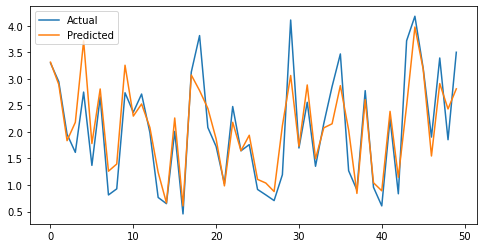

In [28]:
forest_df = pd.DataFrame({'Actual': y_test, 'Predicted': forest_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(forest_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

After building different models, let's recap the score of each of them:

In [29]:
print('The linear regression score is: ' + str(lreg_score))
print('The lasso regression score is: ' + str(lasso_score))
print('The ridge regression score is: ' + str(ridge_score))
print('The decission tree regression score is: ' + str(tree_score))
print('The ElasticNet regression score is: ' + str(en_score))
print('The random forest regression score is: ' + str(forest_score))

The linear regression score is: 0.5679160646105937
The lasso regression score is: 0.4852240585919536
The ridge regression score is: 0.5679150330218798
The decission tree regression score is: 0.5544418594039235
The ElasticNet regression score is: 0.29449242304457723
The random forest regression score is: 0.7702351774528651


As we can see, the best performing model is the random forest regressor. In the following part, I will try to fine tune the model to reach higher precision. 

### Hyperparameter tunning

At this point, I will try to find the bes parameters to tune our random forest regression:

In [120]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
forest = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

And here we have our best parameters:

In [123]:
forest_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

Let's try them out on a new regression and compare its accuracy with the last model.

In [129]:
# forest
opt_forest = RandomForestRegressor(n_estimators=311, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)

# Tree score
opt_forest.fit(X_train, y_train)
opt_forest_score = opt_forest.score(X_test, y_test)
opt_forest_pred = opt_forest.predict(X_test)

In [128]:
print('The random forest regression score is: ' + str(forest_score))
print('The optimized random forest regression score is: ' + str(opt_forest_score))

The random forest regression score is: 0.7698077101041599
The optimized random forest regression score is: 0.7859919199332337


We have improved the score of the model 2.5% by tunning its hyperparameters. At this point, we can say that the optimized random forest regressor is the best fit for our model. Let's plot its predictions. 

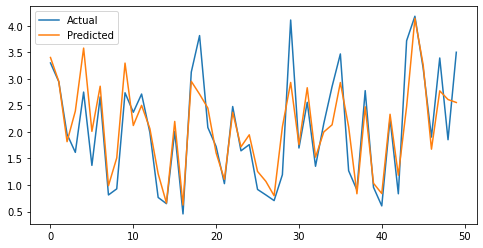

In [130]:
opt_forest_df = pd.DataFrame({'Actual': y_test, 'Predicted': opt_forest_pred})

fig, ax = plt.subplots(figsize=[8,4])

plt.plot(opt_forest_df[:50])
plt.legend(['Actual','Predicted'])

plt.show()

## Conclusion

We have done an exhaustive analysis of different machine learning linear models and fitted our data into them. After all, it looks like an **optimized random forest regression model** fits our dataset the best with a $R^2$ of 0.78.